In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/trading_data.txt", sep = '|')

In [3]:
df.columns

Index(['co_code', 'company_name', 'co_stkdate', 'nse_opening_price',
       'nse_high_price', 'nse_low_price', 'nse_closing_price', 'nse_returns',
       'nse_traded_qty', 'nse_no_of_trans'],
      dtype='object')

In [4]:
company_name = list(df['company_name'].unique())

In [5]:
company_name

['AXIS BANK LTD.',
 'BAJAJ FINSERV LTD.',
 'BAJAJ HOLDINGS & INVST. LTD.',
 'BAJAJ FINANCE LTD.',
 'CHOLAMANDALAM INVESTMENT & FINANCE CO. LTD.',
 'HOUSING DEVELOPMENT FINANCE CORPN. LTD.',
 'H D F C ASSET MGMT. CO. LTD.',
 'H D F C BANK LTD.',
 'H D F C LIFE INSURANCE CO. LTD.',
 'I C I C I BANK LTD.',
 'I C I C I LOMBARD GENERAL INSURANCE CO. LTD.',
 'I C I C I PRUDENTIAL LIFE INSURANCE CO. LTD.',
 'KOTAK MAHINDRA BANK LTD.',
 'MAHINDRA & MAHINDRA FINANCIAL SERVICES LTD.',
 'PIRAMAL ENTERPRISES LTD.',
 'POWER FINANCE CORPN. LTD.',
 'R E C LTD.',
 'S B I LIFE INSURANCE CO. LTD.',
 'STATE BANK OF INDIA',
 'SHRIRAM TRANSPORT FINANCE CO. LTD.']

In [10]:
df['co_stkdate'] = pd.to_datetime(df['co_stkdate'])
df.head()

,co_code,company_name,co_stkdate,nse_opening_price,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_no_of_trans
0,256066,AXIS BANK LTD.,2004-12-31,185.00,187.00,183.00,185.20,1.01,173505.0,1859.0
1,256066,AXIS BANK LTD.,2005-03-01,185.00,191.00,185.00,190.20,1.03,284202.0,2838.0
2,256066,AXIS BANK LTD.,2005-04-01,191.10,192.00,187.00,189.70,1.00,223165.0,1562.0
3,256066,AXIS BANK LTD.,2005-05-01,189.95,189.95,177.55,184.25,0.97,232617.0,2081.0
4,256066,AXIS BANK LTD.,2005-06-01,184.10,190.00,177.00,185.15,1.00,238522.0,2435.0


In [11]:
df.groupby(df['company_name']).min()['co_stkdate']

company_name
AXIS BANK LTD.                                 2004-12-31
BAJAJ FINANCE LTD.                             2004-12-31
BAJAJ FINSERV LTD.                             2008-01-07
BAJAJ HOLDINGS & INVST. LTD.                   2004-12-31
CHOLAMANDALAM INVESTMENT & FINANCE CO. LTD.    2004-12-31
H D F C ASSET MGMT. CO. LTD.                   2018-01-10
H D F C BANK LTD.                              2004-12-31
H D F C LIFE INSURANCE CO. LTD.                2017-01-12
HOUSING DEVELOPMENT FINANCE CORPN. LTD.        2004-12-31
I C I C I BANK LTD.                            2004-12-31
I C I C I LOMBARD GENERAL INSURANCE CO. LTD.   2017-01-11
I C I C I PRUDENTIAL LIFE INSURANCE CO. LTD.   2016-01-11
KOTAK MAHINDRA BANK LTD.                       2004-12-31
MAHINDRA & MAHINDRA FINANCIAL SERVICES LTD.    2006-01-06
PIRAMAL ENTERPRISES LTD.                       2004-12-31
POWER FINANCE CORPN. LTD.                      2007-01-03
R E C LTD.                                     2008-01-04
S

In [6]:
features_company = ['company_name','co_stkdate','nse_opening_price',
       'nse_high_price', 'nse_low_price', 'nse_closing_price', 'nse_returns',
       'nse_traded_qty', 'nse_no_of_trans']

feature_trading = ['nse_opening_price','co_stkdate',
       'nse_high_price', 'nse_low_price', 'nse_closing_price', 'nse_returns',
       'nse_traded_qty', 'nse_no_of_trans']

In [7]:
df_trading = df[features_company]

In [8]:
df_trading

,company_name,co_stkdate,nse_opening_price,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_no_of_trans
0,AXIS BANK LTD.,31-12-2004,185.00,187.00,183.00,185.20,1.0100,173505.0,1859.0
1,AXIS BANK LTD.,03-01-2005,185.00,191.00,185.00,190.20,1.0300,284202.0,2838.0
2,AXIS BANK LTD.,04-01-2005,191.10,192.00,187.00,189.70,1.0000,223165.0,1562.0
3,AXIS BANK LTD.,05-01-2005,189.95,189.95,177.55,184.25,0.9700,232617.0,2081.0
4,AXIS BANK LTD.,06-01-2005,184.10,190.00,177.00,185.15,1.0000,238522.0,2435.0
...,...,...,...,...,...,...,...,...,...
56049,SHRIRAM TRANSPORT FINANCE CO. LTD.,24-12-2019,1159.00,1163.40,1147.50,1154.00,0.9926,571334.0,22709.0
56050,SHRIRAM TRANSPORT FINANCE CO. LTD.,26-12-2019,1149.90,1167.60,1147.90,1156.15,1.0019,526070.0,17237.0
56051,SHRIRAM TRANSPORT FINANCE CO. LTD.,27-12-2019,1163.30,1169.70,1152.95,1164.65,1.0074,520751.0,22842.0
56052,SHRIRAM TRANSPORT FINANCE CO. LTD.,30-12-2019,1169.00,1176.00,1157.25,1162.80,0.9984,427869.0,14122.0


In [9]:
df_axis = df_trading[df_trading['company_name'] == company_name[0]]
df_axis = df_axis[feature_trading]

In [10]:
df_axis

,nse_opening_price,co_stkdate,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_no_of_trans
0,185.00,31-12-2004,187.00,183.00,185.20,1.0100,173505.0,1859.0
1,185.00,03-01-2005,191.00,185.00,190.20,1.0300,284202.0,2838.0
2,191.10,04-01-2005,192.00,187.00,189.70,1.0000,223165.0,1562.0
3,189.95,05-01-2005,189.95,177.55,184.25,0.9700,232617.0,2081.0
4,184.10,06-01-2005,190.00,177.00,185.15,1.0000,238522.0,2435.0
...,...,...,...,...,...,...,...,...
3713,744.50,24-12-2019,744.70,737.80,740.65,0.9966,3642916.0,64957.0
3714,737.50,26-12-2019,740.65,733.90,736.50,0.9944,7919368.0,71584.0
3715,739.00,27-12-2019,762.00,736.30,760.15,1.0321,10736285.0,156492.0
3716,760.90,30-12-2019,765.75,751.05,754.10,0.9920,10034206.0,141431.0


In [43]:
df_axis['co_stkdate'] = pd.to_datetime(df_axis['co_stkdate'])

In [48]:
df_axis.set_index('co_stkdate', inplace = True)

In [58]:
df_axis.reset_index(inplace = True)

In [12]:
import matplotlib.pyplot as plt

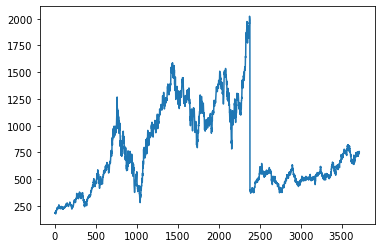

In [13]:
plt.plot(df_axis['nse_closing_price'])

In [16]:
company_data = pd.read_csv('../data/company_data.txt', sep = '|')

In [17]:
company_data

,co_code,company_name,nse_symbol,nse_first_traded_date,nse_suspended_from_date
0,256066,AXIS BANK LTD.,AXISBANK,03-12-1998,NaN
1,374519,BAJAJ FINSERV LTD.,BAJAJFINSV,26-05-2008,NaN
2,28899,BAJAJ HOLDINGS & INVST. LTD.,BAJAJHLDNG,03-11-1994,NaN
3,28897,BAJAJ FINANCE LTD.,BAJFINANCE,09-02-1995,NaN
4,47318,CHOLAMANDALAM INVESTMENT & FINANCE CO. LTD.,CHOLAFIN,12-07-1995,NaN
5,95632,HOUSING DEVELOPMENT FINANCE CORPN. LTD.,HDFC,03-11-1994,NaN
6,88295,H D F C ASSET MGMT. CO. LTD.,HDFCAMC,06-08-2018,NaN
7,88297,H D F C BANK LTD.,HDFCBANK,14-06-1995,NaN
8,88320,H D F C LIFE INSURANCE CO. LTD.,HDFCLIFE,17-11-2017,NaN
9,96379,I C I C I BANK LTD.,ICICIBANK,24-09-1997,NaN


In [19]:
code_dict = dict(zip(company_data['company_name'], company_data['nse_symbol']))

In [20]:
code_dict

{'AXIS BANK LTD.': 'AXISBANK',
 'BAJAJ FINSERV LTD.': 'BAJAJFINSV',
 'BAJAJ HOLDINGS & INVST. LTD.': 'BAJAJHLDNG',
 'BAJAJ FINANCE LTD.': 'BAJFINANCE',
 'CHOLAMANDALAM INVESTMENT & FINANCE CO. LTD.': 'CHOLAFIN',
 'HOUSING DEVELOPMENT FINANCE CORPN. LTD.': 'HDFC',
 'H D F C ASSET MGMT. CO. LTD.': 'HDFCAMC',
 'H D F C BANK LTD.': 'HDFCBANK',
 'H D F C LIFE INSURANCE CO. LTD.': 'HDFCLIFE',
 'I C I C I BANK LTD.': 'ICICIBANK',
 'I C I C I LOMBARD GENERAL INSURANCE CO. LTD.': 'ICICIGI',
 'I C I C I PRUDENTIAL LIFE INSURANCE CO. LTD.': 'ICICIPRULI',
 'KOTAK MAHINDRA BANK LTD.': 'KOTAKBANK',
 'MAHINDRA & MAHINDRA FINANCIAL SERVICES LTD.': 'M&MFIN',
 'PIRAMAL ENTERPRISES LTD.': 'PEL',
 'POWER FINANCE CORPN. LTD.': 'PFC',
 'R E C LTD.': 'RECLTD',
 'S B I LIFE INSURANCE CO. LTD.': 'SBILIFE',
 'STATE BANK OF INDIA': 'SBIN',
 'SHRIRAM TRANSPORT FINANCE CO. LTD.': 'SRTRANSFIN'}

In [24]:
data = {}
for cc in company_name:
    data[code_dict[cc]] = df_trading[df_trading['company_name'] == cc]

,company_name,co_stkdate,nse_opening_price,nse_high_price,nse_low_price,nse_closing_price,nse_returns,nse_traded_qty,nse_no_of_trans
38249,PIRAMAL ENTERPRISES LTD.,31-12-2004,322.00,325.00,315.50,319.40,1.0000,201973.0,3728.0
38250,PIRAMAL ENTERPRISES LTD.,03-01-2005,324.90,330.80,315.00,316.95,0.9900,302238.0,5534.0
38251,PIRAMAL ENTERPRISES LTD.,04-01-2005,319.80,319.80,300.00,309.05,0.9800,267523.0,5109.0
38252,PIRAMAL ENTERPRISES LTD.,05-01-2005,308.00,311.00,280.00,289.45,0.9400,333088.0,6974.0
38253,PIRAMAL ENTERPRISES LTD.,06-01-2005,290.95,299.40,264.30,269.45,0.9300,598654.0,8793.0
...,...,...,...,...,...,...,...,...,...
41962,PIRAMAL ENTERPRISES LTD.,24-12-2019,1647.65,1655.95,1635.70,1648.35,1.0004,534461.0,11731.0
41963,PIRAMAL ENTERPRISES LTD.,26-12-2019,1654.00,1655.00,1623.45,1641.20,0.9957,739616.0,20356.0
41964,PIRAMAL ENTERPRISES LTD.,27-12-2019,1645.30,1652.00,1615.60,1632.90,0.9949,577722.0,17267.0
41965,PIRAMAL ENTERPRISES LTD.,30-12-2019,1618.00,1623.75,1576.20,1585.05,0.9944,1118248.0,34901.0


In [33]:
import json
import pickle

In [34]:
file = '../data/data.pkl'
with open(file, 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
with open(file, 'rb') as handle:
    b = pickle.load(handle)

<AxesSubplot:>

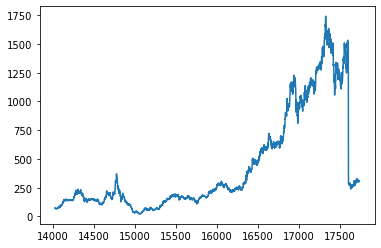

In [43]:
b['CHOLAFIN']['nse_closing_price'].plot()